In [56]:
import pandas as pd
import altair as alt
from IPython.display import display, Markdown
import missingno as msno

In [124]:
df = pd.read_csv('/Users/kaitlinsinger/wa_notify/DEN_future/data_extraction/manipulated_data/simplified_wide_df_with_date_loc_imputed.csv')

In [125]:
df.head()

,Unnamed: 0,Unnamed: 0.1,source,pm_start_date,pm_end_date,pm_location,cases_assigned_count,cases_interviewed_count,cases_interviewed_perc,cases_named_contacts_count,...,quarantine_adherent_perc,staff_hired_ci_count,staff_hired_ci_per_health_dept_mean,staff_hired_count,staff_hired_ct_count,staff_hired_ct_per_health_dept_mean,user_cases_notifying,users_with_code,region,time_period
0,0,0,A Multifaceted Evaluation of a COVID-19 Contac...,2021-03-01,03/31/2021,King County,NaN,NaN,NaN,NaN,...,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T3
1,1,1,A Multifaceted Evaluation of a COVID-19 Contac...,2021-04-01,06/30/2020,King County,NaN,NaN,76.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T4
2,2,2,A Multifaceted Evaluation of a COVID-19 Contac...,2020-07-01,06/30/2021,King County,52317.0,42900.0,82.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T2
3,3,3,A Multifaceted Evaluation of a COVID-19 Contac...,2020-07-01,09/30/2020,King County,NaN,NaN,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T2
4,4,4,A Patient-Initiated Digital COVID-19 Contact N...,2020-05-18,08/17/2020,United States*,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,T2


In [126]:
#df.columns

In [127]:
cols_interest = ['source', 'pm_start_date', 'pm_end_date',
       'pm_location', 'cases_assigned_count', 'cases_interviewed_count',
        'cases_interviewed_perc',
       'cases_named_contacts_count',
       'cases_not_assigned_count',
       'cases_per_staff_month', 
       'cases_positive_from_test_mean', 'cases_positive_from_test_med',
       'cases_reached_count', 'cases_reached_from_symptom_mean',
       'cases_reached_from_symptom_med', 'cases_reached_from_test_max',
       'cases_reached_from_test_mean', 'cases_reached_from_test_med',
       'cases_reached_perc', 
        # 'contact_named_count', 'contacts_per_staff_month', # needs fixing
        'contacts_assigned_count',
       'contacts_infected_count', 'contacts_infected_perc',
       'contacts_interviewed_count', 'contacts_interviewed_perc',
       'contacts_named_cases_naming', 'contacts_named_cases_naming_ratio',
       'contacts_named_cases_naming_ratio_mean', 'contacts_named_count',
       'contacts_named_count_household', 
        'contacts_named_perc',
       'contacts_named_perc_household', 'contacts_named_ratio_mean',
       'contacts_named_ratio_mean_cases_naming',
       'contacts_named_ratio_mean_household', 'contacts_named_ratio_med',
       'contacts_reached_count', 'contacts_reached_from_cases_pos_mean',
       'contacts_reached_from_cases_pos_med',
       'contacts_reached_from_cases_test_mean',
       'contacts_reached_from_exposure_mean',
       'contacts_reached_from_named_hdcount',
       'contacts_reached_from_named_mean', 'contacts_reached_from_named_med',
       'contacts_reached_perc',
        'hr_cost', 'hr_hours', 'monetary_cost',
       'notifications_recieved_count', 'notifications_sent_max',
       'num_users_count', 'num_users_upper_bound', 'percent_naming_contacts',
       'quarantine_adherent_perc', 'staff_hired_ci_count',
       'staff_hired_ci_per_hd_mean', 'staff_hired_count',
       'staff_hired_ct_count', 'staff_hired_ct_per_hd_mean',
       'staff_hired_per_10kpop', 'test_result_from_collection_mean',
       'user_cases_notifying', 'users_with_code', 'region', 'time_period']

In [128]:
# fuzzy columns


In [129]:
df['ratio_cases_contacts_intv'] = df['cases_interviewed_count']/df['contacts_interviewed_count']

In [130]:
# data profiling
df.describe()

,Unnamed: 0,Unnamed: 0.1,cases_assigned_count,cases_interviewed_count,cases_interviewed_perc,cases_named_contacts_count,cases_not_assigned_count,cases_per_staff_month,cases_positive_from_test_mean,cases_positive_from_test_med,...,percent_naming_contacts,quarantine_adherent_perc,staff_hired_ci_count,staff_hired_ci_per_health_dept_mean,staff_hired_count,staff_hired_ct_count,staff_hired_ct_per_health_dept_mean,user_cases_notifying,users_with_code,ratio_cases_contacts_intv
count,91.00000,91.00000,5.700000e+01,5.200000e+01,51.000000,4.700000e+01,6.000000,14.000000,2.000000,11.000000,...,49.000000,1.0,14.000000,14.000000,4.000000,14.00000,14.000000,2.000000,2.000000,13.000000
mean,45.00000,45.00000,8.424133e+05,3.862469e+05,69.288824,1.895171e+05,17199.000000,120.785714,40.670000,48.000000,...,52.036735,81.0,37499.500000,714.428571,1215.500000,35464.00000,664.285714,72521.500000,261789.500000,3.604419
std,26.41338,26.41338,1.640675e+06,6.766037e+05,34.550558,3.219684e+05,28680.839081,72.302972,38.169624,15.178933,...,21.180928,NaN,10845.303441,202.581689,869.038357,12265.24458,229.232978,6243.045771,261422.326752,5.958107
min,0.00000,0.00000,4.000000e+01,4.000000e+01,26.610000,4.000000e+01,18.000000,32.000000,13.680000,24.000000,...,14.000000,81.0,26288.000000,487.000000,600.000000,22292.00000,425.000000,68107.000000,76936.000000,0.561793
25%,22.50000,22.50000,4.987000e+03,3.400500e+03,48.375000,6.805000e+02,2777.000000,67.250000,27.175000,48.000000,...,40.040000,81.0,28847.750000,562.000000,750.000000,24107.00000,458.000000,70314.250000,169362.750000,1.113771
50%,45.00000,45.00000,1.410600e+04,8.675500e+03,70.650000,2.890000e+03,5896.500000,115.000000,40.670000,48.000000,...,47.200000,81.0,32354.500000,628.000000,881.000000,31645.00000,586.000000,72521.500000,261789.500000,1.588116
75%,67.50000,67.50000,9.410350e+05,5.670642e+05,82.350000,3.426345e+05,12556.750000,134.500000,54.165000,48.000000,...,63.240000,81.0,45323.250000,855.000000,1346.500000,45371.25000,852.000000,74728.750000,354216.250000,1.863993
max,90.00000,90.00000,6.078802e+06,2.681000e+06,263.650000,1.214861e+06,74869.000000,266.000000,67.660000,72.000000,...,100.000000,81.0,54651.000000,1072.000000,2500.000000,54905.00000,1077.000000,76936.000000,446643.000000,22.525481


<AxesSubplot:>

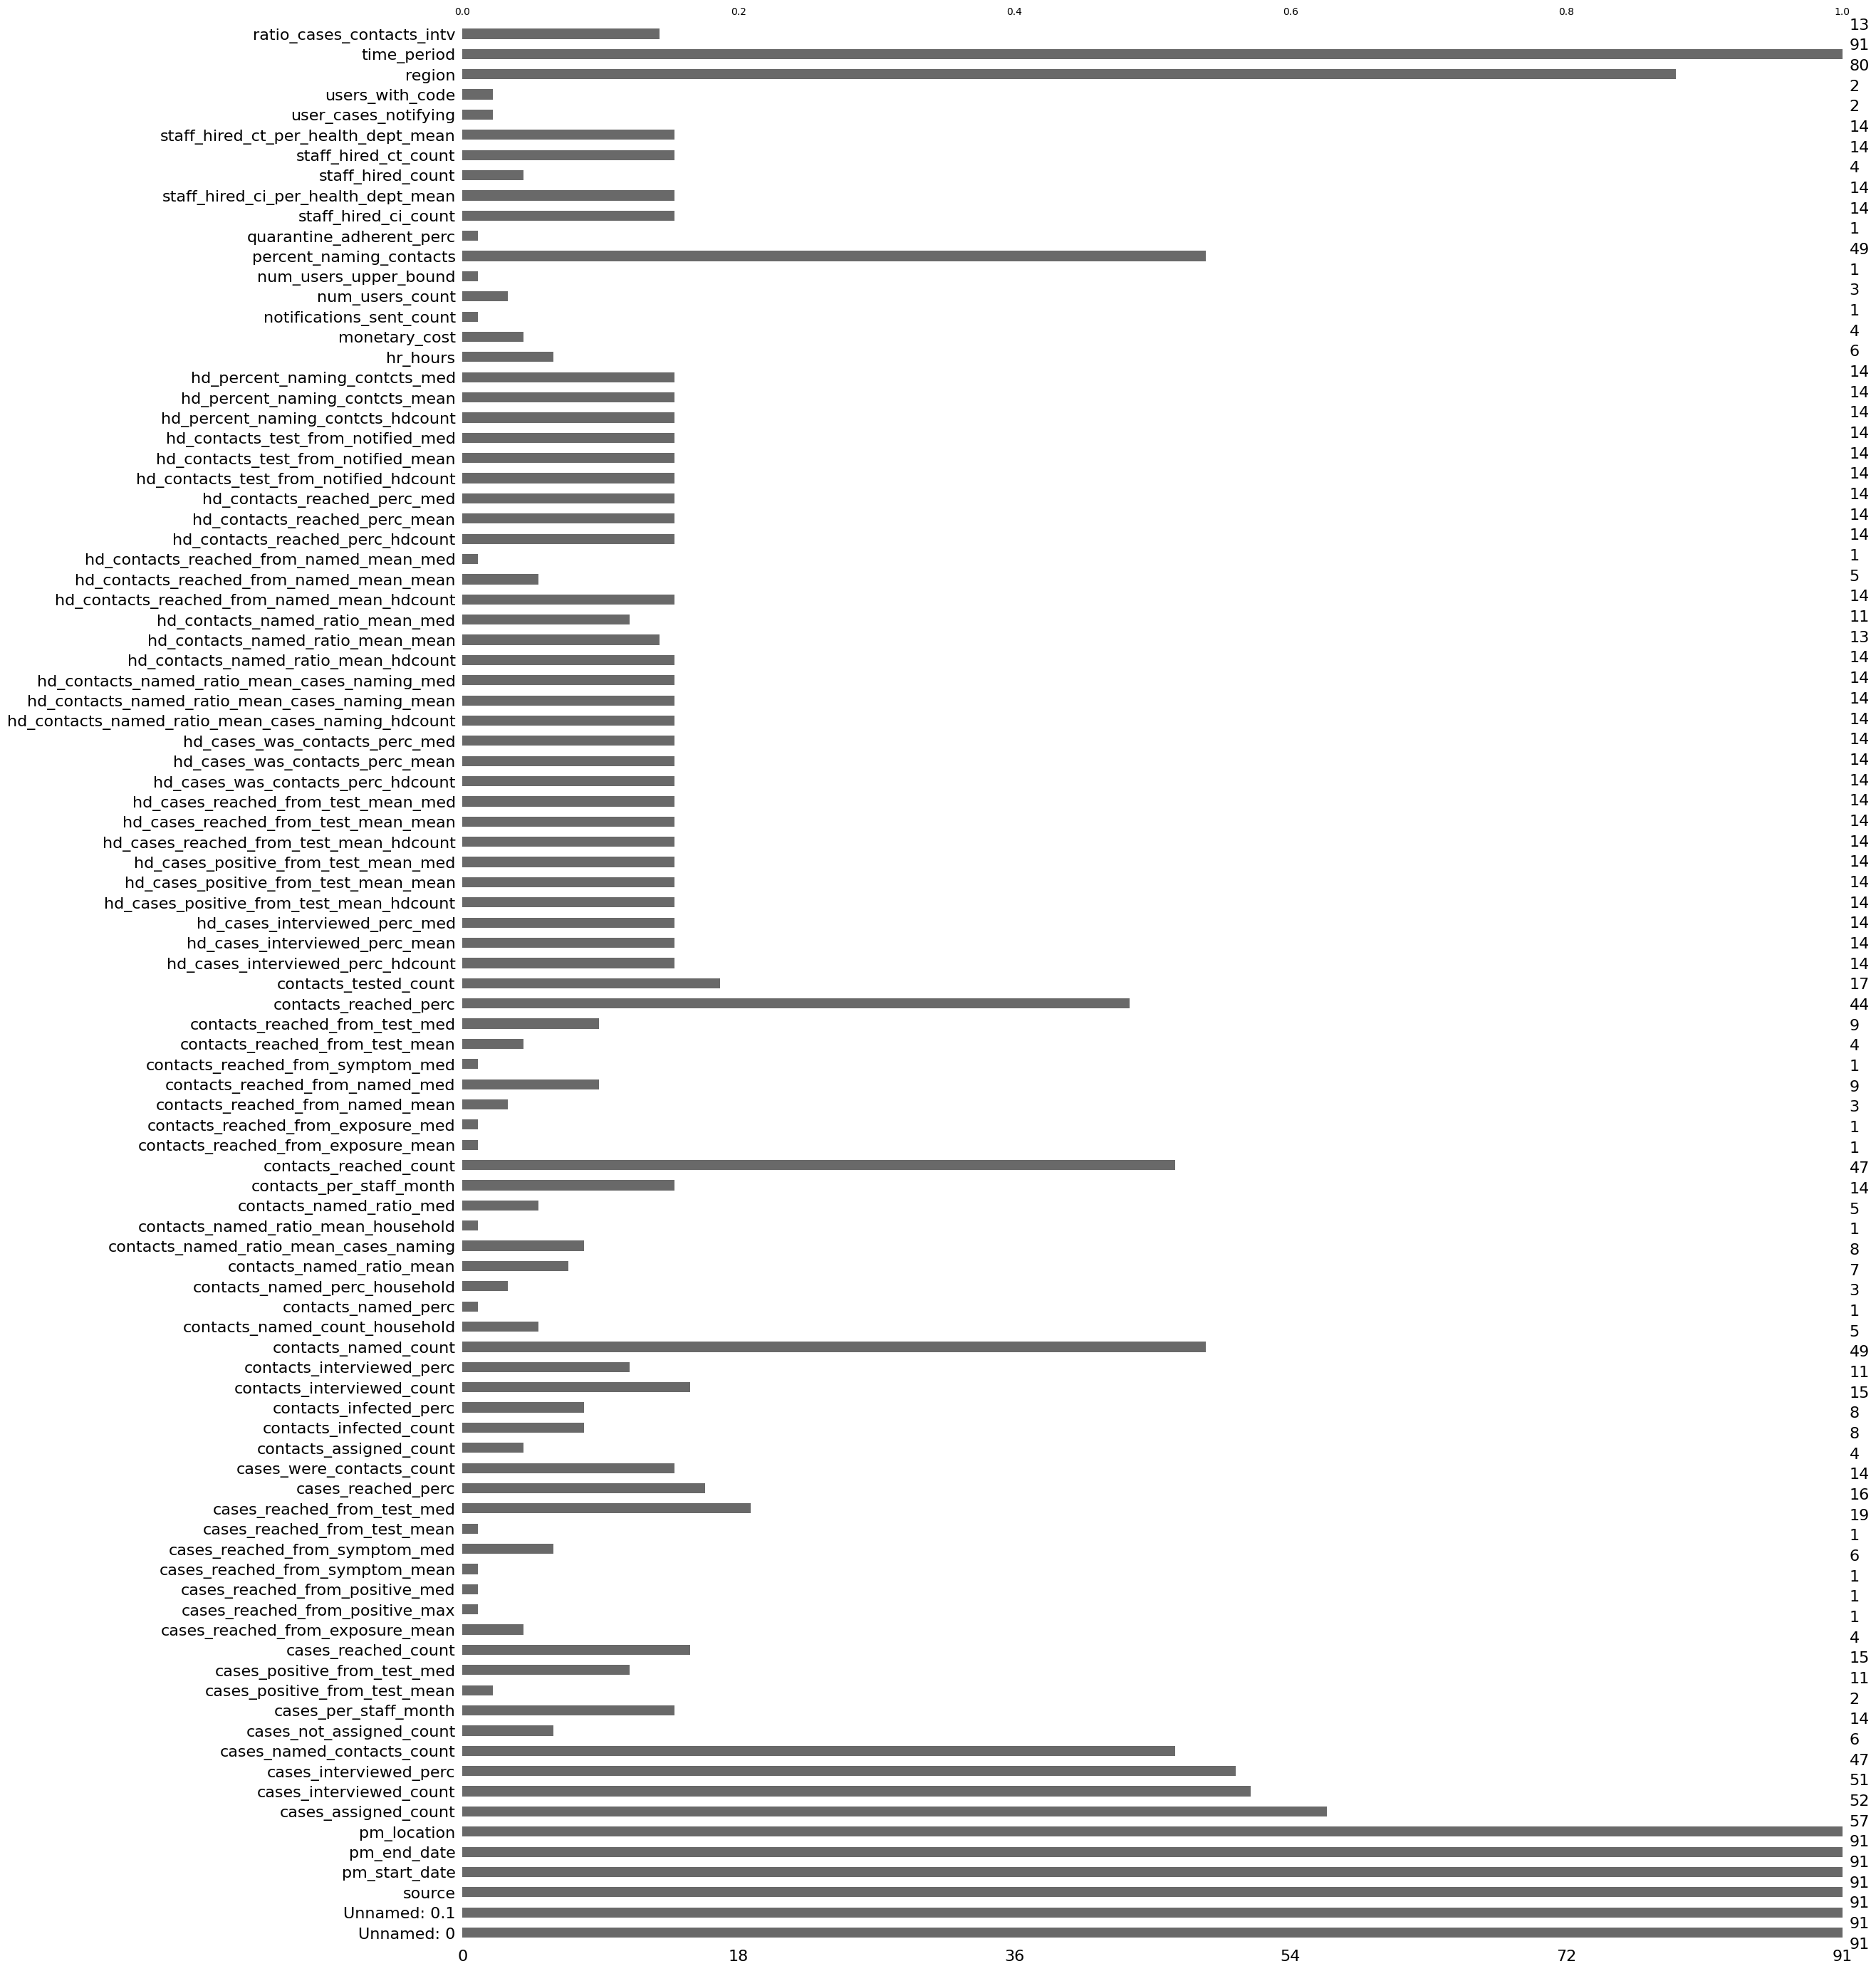

In [131]:
# missingness map
#msno.matrix(df[cols_interest], labels=True, label_rotation=90)
#plt.show()
msno.bar(df)

In [132]:
# data analysis

In [133]:
alt.Chart(df).mark_tick().encode(
    alt.X('cases_assigned_count:Q')
)

alt.Chart(...)

In [134]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_assigned_count:Q",  scale=alt.Scale(type='log')),
    alt.Y("source:N")
)

alt.Chart(...)

In [135]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_interviewed_count:Q",  scale=alt.Scale(type='log')),
    alt.Y("source:N")
)

alt.Chart(...)

In [136]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_interviewed_perc:Q"),
    alt.Y("source:N")
)

alt.Chart(...)

In [137]:
alt.Chart(df).mark_point().encode(
    alt.X("ratio_cases_contacts_intv:Q"),
    alt.Y("source:N")
)

alt.Chart(...)

In [138]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_interviewed_perc:Q"),
    alt.Y("region:N")
)

alt.Chart(...)

In [139]:
alt.Chart(df).mark_point().encode(
    alt.X("time_period:O"),
    alt.Y("cases_interviewed_perc:Q"),
    alt.Size("cases_assigned_count:Q", ),
    #alt.Color("region:N"),
    tooltip = [
        alt.Tooltip("source:N"),
        alt.Tooltip("pm_start_date:T"),
        alt.Tooltip("pm_end_date:T")
   ]
).properties(
    width=500
)

alt.Chart(...)